In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
nlp = spacy.load('en_core_web_md')

In [2]:
df = pd.read_csv('data_new/2010-2020_spp_congress.csv')
display(df.head())

,Unnamed: 0,author,affiliation,title,abstract,code
0,0,Hans-Albert Bachor,"Australian Centre for Quantum Atom Optics, Aus...",Using the quantum properties of light,Optics and photonics are parts of our modern l...,SPP-2010-PS-01
1,1,Eric A. Galapon,"National Institute of Physics, University of t...",Time and quantum mechanics,In the Hilbert space formulation of quantum me...,SPP-2010-PS-02
2,2,"Christopher Bernido, Ma. Victoria Carpio-Berni...","Research Center for Theoretical Physics, Centr...",On generating secondary helical structures fro...,Proteins are known to carry out their biologic...,SPP-2010-PS-03
3,3,"Erika Fille Legara, Clarissa David, Jenna Mae ...","National Institute of Physics, University of t...",Topology of surrounding concepts in frames: A ...,"Using complex networks tools, the work provide...",SPP-2010-PS-04
4,4,Ma. Victoria Carpio-Bernido,"Research Center for Theoretical Physics, Centr...",On pedagogy and plurality of neuronal types,We discuss some open questions in pedagogy and...,SPP-2010-PS-05


In [3]:
display(df.info())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1981 non-null   int64 
 1   author       1981 non-null   object
 2   affiliation  1980 non-null   object
 3   title        1981 non-null   object
 4   abstract     1981 non-null   object
 5   code         1981 non-null   object
dtypes: int64(1), object(5)
memory usage: 93.0+ KB


None

(1981, 6)

In [4]:
docs = df.abstract.to_list()
docs

["Optics and photonics are parts of our modern lives. We use these technologies almost every day. There is an abundance of optical sensors, communication and data storage devices that use light. While many advances have been made by using the laser to improve the performance of these devices, the full quantum properties of photons have not been harnessed. Most of today's photonics is still classical. This talk provides an overview of recent developments in quantum optics. It will explain the limitations that exist due to the quantum nature of light and the statistics of photons and also the opportunities we will have in the future to improve the quality of the information carried in a laserbeam. I will explain recent ideas and trends in technology that will make the quantum properties accessible and an important feature of future technologies.",
 "In the Hilbert space formulation of quantum mechanics, Pauli's well known theorem asserts that no self-adjoint operator exists that is conju

In [5]:

#regex tokenizer
tokenizer = RegexpTokenizer(r'\w+') #a-z,A-Z,0-9
for i in range(len(docs)):  
    docs[i] = tokenizer.tokenize(docs[i].lower()) # convert to lowercase.
    
#remove numbers
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove single character tokens.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

'''
# Lemmatize the documents using nltk.
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
'''

#lemmatize the documents using spacy.
docs = [' '.join(doc) for doc in docs]
docs = [[token.lemma_ if (token.pos_ == 'NOUN') or (token.pos_ == 'PROPN') or (token.pos_ == 'ADJ') or (token.pos_ == 'VERB') else token for token in nlp(doc)] for doc in docs]
docs = [[str(token) for token in doc] for doc in docs]


# Stopword removal
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 
extend = ['method','model','used', 'use', 'result','show','also',
          'via','one','two','three','observe','find','different',
          'value','wa','study','paper', 'talk', 'obtain']
stop_words.extend(extend)
docs = [[token for token in doc if not token in stop_words] for doc in docs]

In [6]:
docs

[['optics',
  'photonic',
  'part',
  'modern',
  'life',
  'technology',
  'almost',
  'every',
  'day',
  'abundance',
  'optical',
  'sensor',
  'communication',
  'data',
  'storage',
  'device',
  'light',
  'many',
  'advance',
  'make',
  'laser',
  'improve',
  'performance',
  'device',
  'full',
  'quantum',
  'property',
  'photon',
  'harness',
  'today',
  'photonic',
  'still',
  'classical',
  'provide',
  'overview',
  'recent',
  'development',
  'quantum',
  'optic',
  'explain',
  'limitation',
  'exist',
  'due',
  'quantum',
  'nature',
  'light',
  'statistic',
  'photon',
  'opportunity',
  'future',
  'improve',
  'quality',
  'information',
  'carry',
  'laserbeam',
  'explain',
  'recent',
  'idea',
  'trend',
  'technology',
  'make',
  'quantum',
  'property',
  'accessible',
  'important',
  'feature',
  'future',
  'technology'],
 ['hilbert',
  'space',
  'formulation',
  'quantum',
  'mechanics',
  'pauli',
  'well',
  'known',
  'theorem',
  'assert',
  

In [7]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=1)
for i in range(len(docs)):
    for token in bigram[docs[i]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[i].append(token)

In [8]:

from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
#dictionary.filter_extremes(no_below=20, no_above=0.5)

In [9]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [10]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 19218
Number of documents: 1981


In [18]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 13
chunksize = 2000
passes = 100
iterations = 1000
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state = 42
)

In [19]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -3.4702.
[([(0.018103462, 'zno'),
   (0.008475902, 'sample'),
   (0.007099726, 'oxide'),
   (0.007090354, 'raman'),
   (0.0070883525, 'spectroscopy'),
   (0.007042646, 'peak'),
   (0.0070360936, 'temperature'),
   (0.006334489, 'silicon'),
   (0.0060511692, 'emission'),
   (0.0055830646, 'grow'),
   (0.005379839, 'high'),
   (0.0052072797, 'zinc'),
   (0.005061571, 'spectra'),
   (0.0050575333, 'substrate'),
   (0.004967684, 'increase'),
   (0.004883534, 'fabricate'),
   (0.004849784, 'layer'),
   (0.004752396, 'uv'),
   (0.0046021705, 'concentration'),
   (0.0045865625, 'optical')],
  -1.6945768551799545),
 ([(0.026194705, 'film'),
   (0.010701443, 'substrate'),
   (0.009571949, 'thin'),
   (0.009320877, 'deposition'),
   (0.009259389, 'deposit'),
   (0.008427097, 'sample'),
   (0.0073205275, 'surface'),
   (0.0064576403, 'thin_film'),
   (0.0061659254, 'increase'),
   (0.0058590826, 'xrd'),
   (0.0056867306, 'structure'),
   (0.0053432793, 'image'),
   (0.005

In [20]:
len(top_topics)

13

In [21]:
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)



In [15]:
from gensim.models import CoherenceModel
coherencemodel = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
coherencemodel.get_coherence()

0.3875473228722391

In [16]:
dic = {}
from gensim.models import LdaModel, CoherenceModel

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

for i in range(5,21): #build models with 5-20 number of topics
    
    num_topics = i
    chunksize = 2000
    passes = 100
    iterations = 1000
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

   

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
        random_state = 42
    )
    
    coherencemodel = CoherenceModel(model=model, texts=docs, dictionary=dictionary, coherence='c_v')
    co_score = coherencemodel.get_coherence()
    dic_key = "k = " + str(i) 
    dic.update({dic_key:co_score})
    print_text = str(i) + ": done! " 
    print(print_text)

5: done! 
6: done! 
7: done! 
8: done! 
9: done! 
10: done! 
11: done! 
12: done! 
13: done! 
14: done! 
15: done! 
16: done! 
17: done! 
18: done! 
19: done! 
20: done! 


Text(0.5, 0, 'NUMBER OF TOPICS, K')

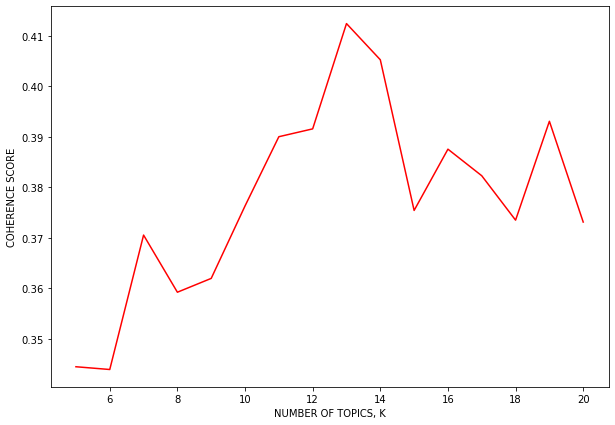

In [22]:
k_list = np.arange(5,21)

plt.figure(figsize = (10,7))
plt.plot(k_list,list(dic.values()), color = 'red')
plt.ylabel("Coherence Score".upper())
plt.xlabel("number of topics, k".upper())